Number of Records: 918
Number of Features: 12

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Data Description:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.00

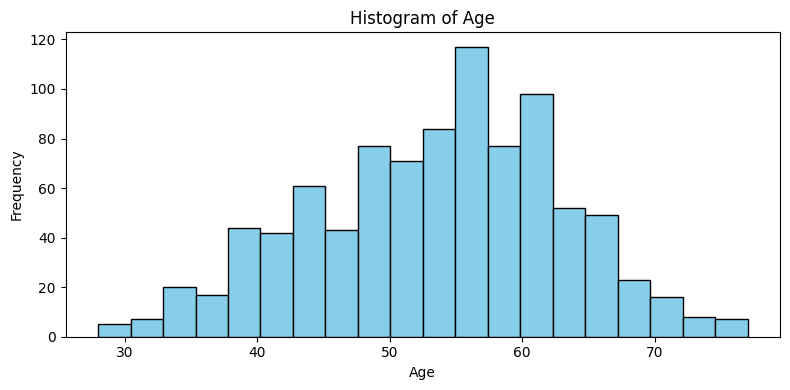


Sex Value Counts:
Sex
M    725
F    193
Name: count, dtype: int64


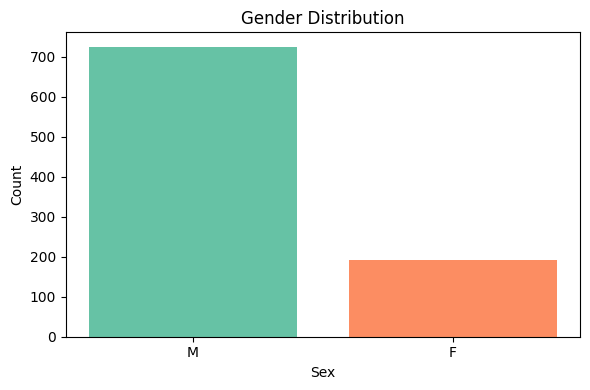

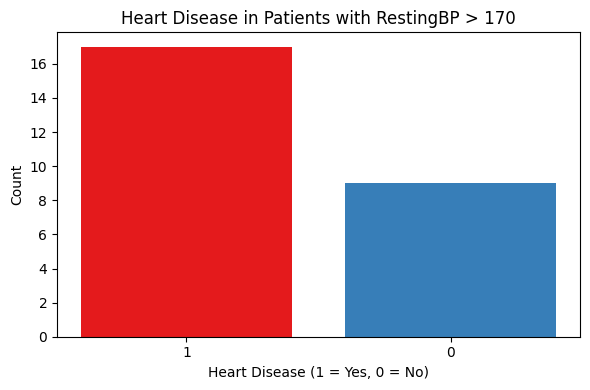

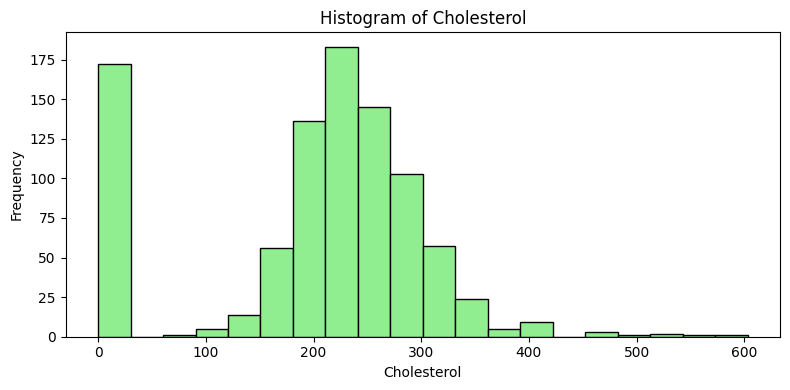


SVM Model Accuracy: 0.875 or 87.5%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("F:/Course(Python&AI)/heart.csv")

# 1 - Print Number Record and Number Features
print("Number of Records:", data.shape[0])
print("Number of Features:", data.shape[1])

# 2 - Display information
print("\nData Info:")
print(data.info())

# 3 - Display Description
print("\nData Description:")
print(data.describe())

# 4 - Print mean of Age
print("\nMean Age:", data['Age'].mean())

# 5 - Histogram For Age
plt.figure(figsize=(8, 4))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('histogram_age.png')
plt.show()

# 6 - Value Counts for Sex
print("\nSex Value Counts:")
print(data['Sex'].value_counts())

# 7 - Bar Chart for Gender Distribution
plt.figure(figsize=(6, 4))
sex_counts = data['Sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, color=['#66c2a5', '#fc8d62']) #66c2a5=Mint Green , #fc8d62=Soft Orange
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('bar_gender_distribution.png')
plt.show()

# 8 - Bar Chart for Heart Disease in Patients with High Blood Pressure (>170)
high_bp = data[data['RestingBP'] > 170]
heart_disease_counts = high_bp['HeartDisease'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(heart_disease_counts.index.astype(str), heart_disease_counts.values, color=['#e41a1c', '#377eb8']) #e41a1c=Strong Red , #377eb8=Medium Blue
plt.title('Heart Disease in Patients with RestingBP > 170')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('bar_heart_high_bp.png')
plt.show()

# 9 - Histogram for Cholesterol
plt.figure(figsize=(8, 4))
plt.hist(data['Cholesterol'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('histogram_cholesterol.png')
plt.show()

# 10 - Splitting the Data
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Handle categorical data
X = pd.get_dummies(X, drop_first=True)

# 11 - Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 12 - Training the SVM Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 13 - Display accuracy score as both decimal and percentage
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Display if accuracy > 70%
if accuracy_percentage > 70:
    print(f"\nSVM Model Accuracy: {accuracy:.3f} or {accuracy_percentage:.1f}%")
else:
    print(f"\nSVM Model Accuracy: {accuracy:.3f} or {accuracy_percentage:.1f}% (Below 70%)")

